In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import torch
import random
from tqdm import tqdm
import torch.nn as nn
from tqdm import tqdm
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from google.colab import drive
from keras import utils as np_utils
import os
drive.mount('/content/drive')
import numpy as np
import tensorflow as tf
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize


import tensorflow as tf
import cv2

from sklearn.preprocessing import LabelEncoder
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet121
from keras.applications.xception import Xception
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import InceptionV3
from keras.applications.efficientnet import EfficientNetB5

from keras.applications import imagenet_utils
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths = os.path.join(dirname, filename)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
data=[]
labels=[]

height = 64
width = 64
channels = 3
classes = 3
n_inputs = height * width * channels

path1 = "/content/drive/My Drive/papsmear project/breast/data/benign/"
path2 = "/content/drive/My Drive/papsmear project/breast/data//malignant/"
path3 = "/content/drive/My Drive/papsmear project/breast/data//normal/"


path = [path1, path2, path3]

# print(Class)
i = 0
count=0
for p in path:
    print('data')
    Class=os.listdir(p)
    print(Class)

    count=count+1
    for a in Class:
      labels.append(count)
      image=cv2.imread(p+a)
      image_from_array = Image.fromarray(image, 'RGB')
      size_image = image_from_array.resize((height, width))
      data.append(np.array(size_image))


# Converting data to ndarray -
labels = np.array(labels)
data = np.array(data)

print(data.shape)
print(labels.shape)
print(labels)

# Randomize the order of the input images
s = np.arange(data.shape[0])
np.random.seed(43)
np.random.shuffle(s)
data = data[s]
labels = labels[s]

data
['benign (100)_mask.png', 'benign (105)_mask.png', 'benign (100).png', 'benign (102)_mask.png', 'benign (101)_mask.png', 'benign (1).png', 'benign (103).png', 'benign (105).png', 'benign (103)_mask.png', 'benign (102).png', 'benign (104)_mask.png', 'benign (10).png', 'benign (101).png', 'benign (10)_mask.png', 'benign (106).png', 'benign (104).png', 'benign (100)_mask_1.png', 'benign (1)_mask.png', 'benign (106)_mask.png', 'benign (144)_mask.png', 'benign (121).png', 'benign (129).png', 'benign (11)_mask.png', 'benign (135).png', 'benign (122)_mask.png', 'benign (134).png', 'benign (116).png', 'benign (111).png', 'benign (116)_mask.png', 'benign (132)_mask.png', 'benign (136).png', 'benign (113)_mask.png', 'benign (126)_mask.png', 'benign (114)_mask.png', 'benign (136)_mask.png', 'benign (142).png', 'benign (135)_mask.png', 'benign (108)_mask.png', 'benign (133).png', 'benign (115)_mask.png', 'benign (142)_mask.png', 'benign (121)_mask.png', 'benign (11).png', 'benign (12)_mask.pn

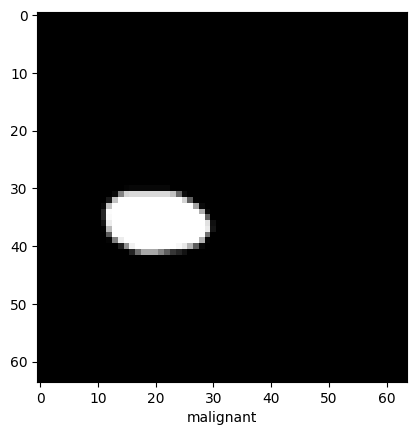

In [53]:
categories = ["benign", "malignant", "normal"]

def show_the_image(i):
    plt.imshow(data[i])
    plt.xlabel(categories[labels[i]])

show_the_image(10)

In [54]:
# Loading ResNet50 wit imagenet weights, include_top means that we loading model without last fully connected layers
model_resnet       = ResNet50(weights = 'imagenet', include_top = False)
model_densenet     = DenseNet121(weights = 'imagenet', include_top = False)
model_efficientnet = EfficientNetB5(weights = 'imagenet', include_top = False)

model_Xception     = Xception(weights = 'imagenet', include_top = False)
model_MobileNet = MobileNet(weights = 'imagenet', include_top = False)
model_InceptionV3     = tf.keras.applications.regnet.RegNetX002(weights = 'imagenet', include_top = False)

feature_xception=model_Xception(data)
features_mobilenet=model_MobileNet(data)
features_inceptiont=model_InceptionV3(data)
features_densenet     = model_densenet.predict(data)


print(feature_xception.shape)
print(features_mobilenet.shape)
print(features_inceptiont.shape)
print(features_densenet.shape)


50/50 [==============================] - 3s 14ms/step
(1578, 2, 2, 2048)
(1578, 2, 2, 1024)
(1578, 2, 2, 368)
(1578, 2, 2, 1024)


In [55]:
extracted_features = []

for f_r, f_d,f_n, f_e, label in zip(feature_xception, features_mobilenet, features_inceptiont,features_densenet, labels):
    #print(f_r.shape[0] )
    #print(f_r.shape[1] )
    #print(f_r.shape[2] )
    f_r = np.reshape(f_r,((f_r.shape[0] * f_r.shape[1] * f_r.shape[2])))
    f_d = np.reshape(f_d,((f_d.shape[0] * f_d.shape[1] * f_d.shape[2])))
    f_n = np.reshape(f_n,((f_n.shape[0] * f_n.shape[1] * f_n.shape[2])))
    f_e = np.reshape(f_e,((f_e.shape[0] * f_e.shape[1] * f_e.shape[2])))

    f_r = np.append(f_r, f_d)
    f_r = np.append(f_r, f_n)
    f_r = np.append(f_r, f_e)
    f_r = np.append(f_r, label)
    extracted_features.append(f_r)

extracted_features = np.array(extracted_features)

print(extracted_features.shape)

(1578, 17857)


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [56]:
# # Normalization :-

X = extracted_features[:, 0:-1]
y = extracted_features[:, -1]

# scaler = StandardScaler()
# scaler.fit(X)
# scaled_X = scaler.transform(X)

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [57]:
# PCA :-

pca = PCA()
pca.fit(scaled_X)
principal_X = pca.transform(scaled_X)

In [58]:
# Train-Test-Split :-

X_train, X_test, y_train, y_test = train_test_split(extracted_features, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1262, 17857)
(316, 17857)
(1262,)
(316,)


In [51]:
# # SVM for Classification :-

from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_svm = svm.predict(X_test)

In [59]:
# Neural Net for classification :-

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,BatchNormalization

model = Sequential()


model.add(Flatten(input_shape=(X_train.shape[1], 1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))


model.add(Dense(3, activation='softmax'))

#Compilation of the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 17857)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               4571648   
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 3)                 771       
                                                                 
Total params: 4638211 (17.69 MB)
Trainable params: 4638211 (17.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
epochs = 50
nn = model.fit(X_train, y_train, batch_size=32, epochs=epochs)

Epoch 1/50
40/40 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0111
Epoch 2/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/50
40/40 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 11/50
4

In [ ]:
pred = model.predict(X_test)
y_nn = np.argmax(pred, axis=1)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_nn)
print("Accuracy is: ", acc*100)

26/26 [==============================] - 0s 2ms/step
Accuracy is:  94.32098765432099


In [ ]:
# print(y_svm[0:10])
# print(y_test[0:10])

In [ ]:
# from sklearn import metrics

# acc_svm = metrics.accuracy_score(y_test, y_svm)
# print("Accuracy of SVM: ", acc_svm*100)

In [ ]:
# # Building Confusion Matrix -
# cm = tf.math.confusion_matrix(labels=y_test, predictions=y_svm)

# import seaborn as sns
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d')
# plt.xlabel("Predicted")
# plt.ylabel("Truth")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report: \n", classification_report(y_test, y_nn))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       167
         1.0       0.93      0.86      0.90       165
         2.0       0.91      0.95      0.93       132
         3.0       0.99      0.98      0.98       174
         4.0       0.97      0.99      0.98       172

    accuracy                           0.95       810
   macro avg       0.95      0.95      0.95       810
weighted avg       0.95      0.95      0.95       810

